In [2]:
import numpy as np
import pandas as pd
import math

In [4]:
df = pd.read_csv('/Users/veerabhadra/Documents/Bsc.CSIT/final-year-project/Codes/spam.csv',encoding=('ISO-8859-1'))

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1897,ham,"Aight, sounds good. When do you want me to com...",NaN,NaN,NaN
10944,spam,dating:i have had two of these. Only started a...,NaN,NaN,NaN
3112,ham,"Wat time liao, where still got.",NaN,NaN,NaN
7407,ham,I have a rather prominent bite mark on my righ...,NaN,NaN,NaN
6725,ham,Ok i go change also...,NaN,NaN,NaN


In [6]:
df.shape

(11146, 5)

In [7]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11146 entries, 0 to 11145
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          11146 non-null  object
 1   v2          11146 non-null  object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 435.5+ KB


In [9]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [11]:
df.sample(5)

,v1,v2
10136,ham,Come around &lt;DECIMAL&gt; pm vikky..i'm ots...
10687,ham,U definitely need a module from e humanities d...
716,spam,+449071512431 URGENT! This is the 2nd attempt ...
2879,spam,Last Chance! Claim ur å£150 worth of discount ...
8791,ham,Don know:)this week i'm going to tirunelvai da.


In [12]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
9927,spam,important information 4 orange user 0789xxxxxx...
9850,ham,I'm glad. You are following your dreams.
7210,spam,"0A$NETWORKS allow companies to bill for SMS, s..."
1944,ham,"Yeah, I'll leave in a couple minutes &amp; let..."
3018,ham,Wat time do u wan 2 meet me later?


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# check for duplicate values
df.duplicated().sum()

5420

In [18]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5726, 2)

## 2.EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

target
0    4845
1     881
Name: count, dtype: int64

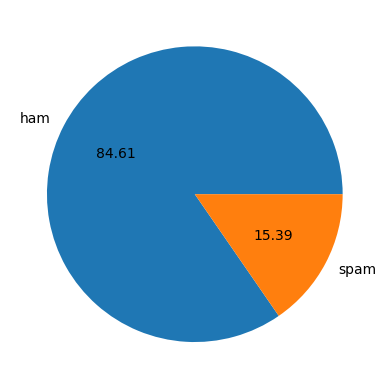

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [25]:
# Data is imbalanced

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/veerabhadra/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
df['num_characters'] = df['text'].apply(len)

In [29]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5726.000000,5726.000000,5726.000000
mean,82.460007,19.114216,2.016766
std,59.143633,13.460934,1.488611
min,2.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,65.000000,16.000000,2.000000
75%,126.000000,27.000000,3.000000
max,910.000000,220.000000,38.000000


In [35]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4845.000000,4845.000000,4845.000000
mean,72.023529,17.492054,1.830753
std,57.266197,13.749521,1.402429
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,94.000000,23.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,881.000000,881.000000,881.000000
mean,139.854711,28.035187,3.039728
std,28.414773,6.634441,1.533567
min,13.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [37]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

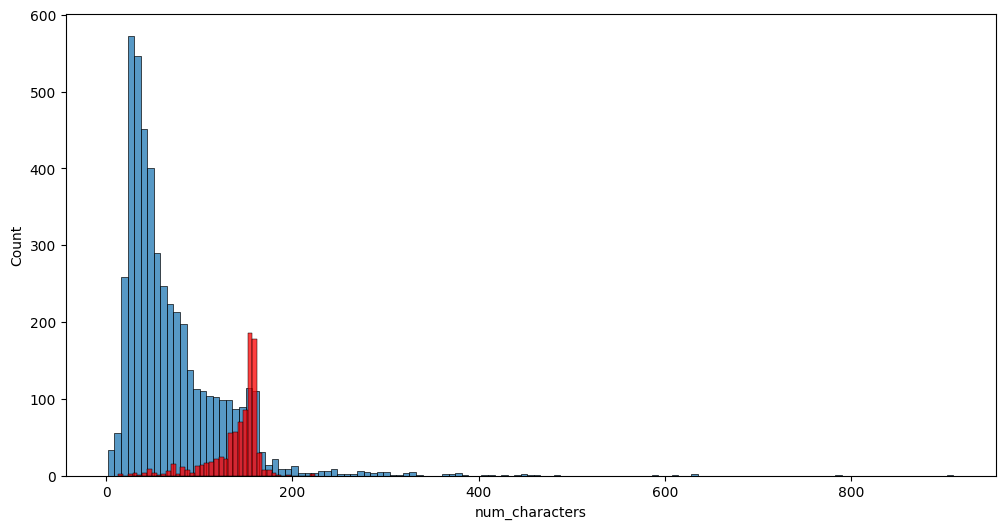

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

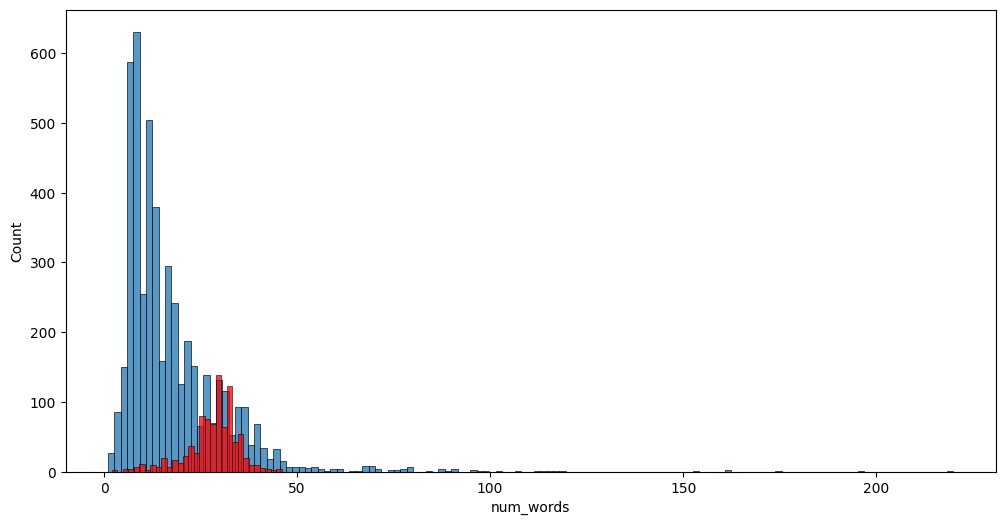

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

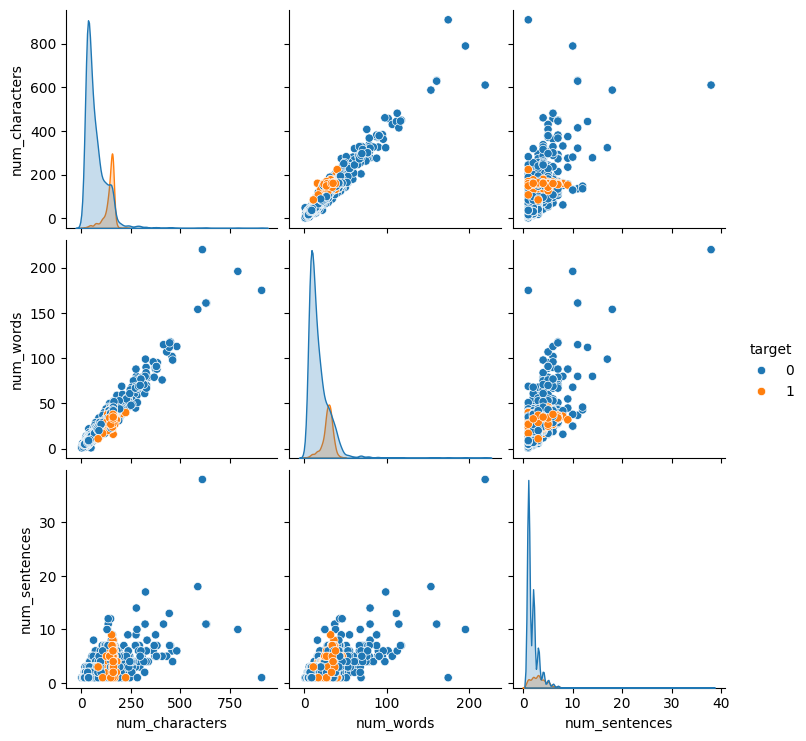

In [40]:
sns.pairplot(df,hue='target')

<Axes: >

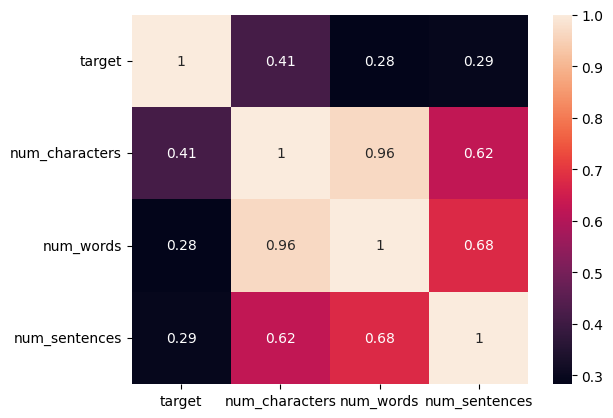

In [41]:
x=df.drop(columns=['text'])
sns.heatmap(x.corr(),annot=True)


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [43]:
from nltk.corpus import stopwords
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [51]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

### For Downloading nltk stopwords

In [53]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/veerabhadra/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [54]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, ok? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight ok cri enough today'

In [55]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [56]:
df['transformed_text'] = df['text'].apply(transform_text)

In [57]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [59]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

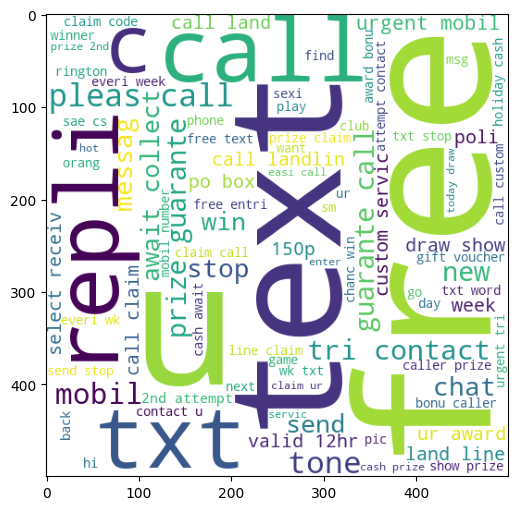

In [60]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [61]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

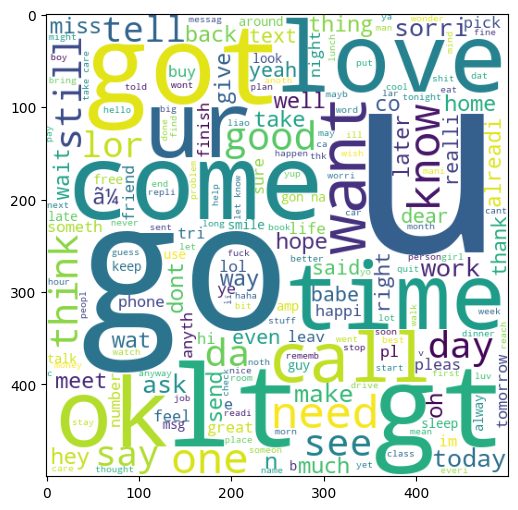

In [62]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [63]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [64]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [65]:
len(spam_corpus)

13469

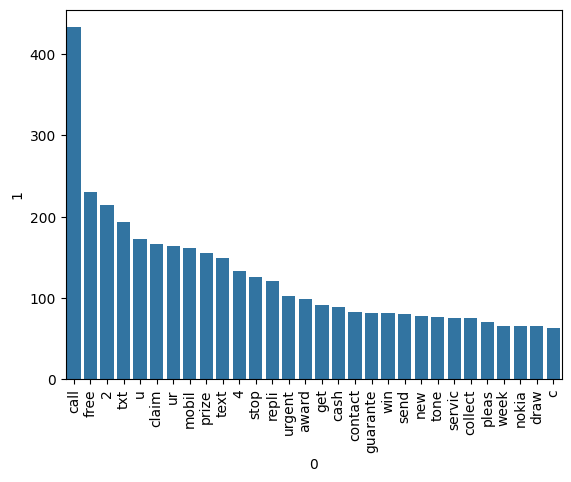

In [66]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [67]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [68]:
len(ham_corpus)

39112

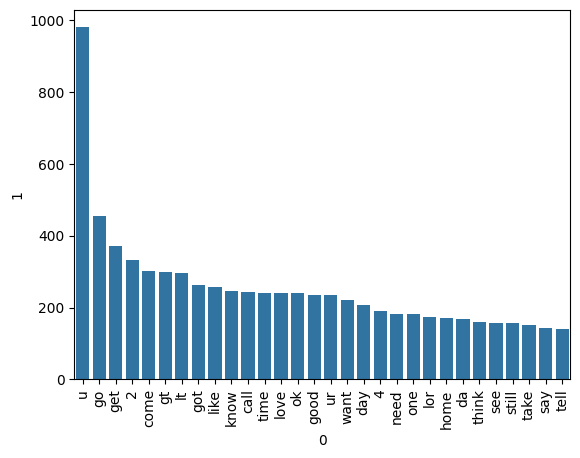

In [69]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [70]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [71]:
class TFIDFVectorizer:
    def __init__(self, max_features=None):
        self.idf = {}
        self.vocab = set()
        self.max_features = max_features

    def fit(self, documents):
        n_docs = len(documents)
        term_counts = {}

        # Count term occurrences in each document
        for document in documents:
            term_seen = set()
            for term in document.split():
                if term not in term_seen:
                    term_seen.add(term)
                    term_counts[term] = term_counts.get(term, 0) + 1

        # Calculate IDF
        for term, count in term_counts.items():
            self.idf[term] = math.log(1+n_docs / (count+1))

        # Update vocabulary
        self.vocab.update(term_counts.keys())

    def transform(self, documents):
        tfidf_matrix = np.zeros((len(documents), len(self.vocab)))
        for idx, document in enumerate(documents):
            # Calculate TF
            term_freq = {}
            for term in document.split():
                term_freq[term] = term_freq.get(term, 0) + 1

            # Calculate TF-IDF
            for term, freq in term_freq.items():
                if term in self.vocab:
                    term_idx = list(self.vocab).index(term)
                    tfidf_matrix[idx, term_idx] = freq * self.idf[term]
        return np.array(tfidf_matrix)

In [72]:
tfidf_vectorizer = TFIDFVectorizer(max_features=10000)

In [73]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=4000)
tfidf_matrix = tfidf_vectorizer.fit(df['transformed_text'])
X = tfidf_vectorizer.transform(df['transformed_text'])
X = selector.fit_transform(X, df['target'])

In [74]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [61]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [77]:
X.shape

(5726, 4000)

In [78]:
y = df['target'].values

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [81]:

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [82]:
class MultinomialNB1:
    def __init__(self):
        self.class_prior = {}
        self.word_probs = {}

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)

        # Compute class prior probabilities
        for cls in self.classes:
            self.class_prior[cls] = np.sum(y == cls) / n_samples

        # Compute conditional probabilities of each word given class
        for cls in self.classes:
            # Select rows where class label is equal to cls
            X_cls = X[y == cls]
            # Calculate total count of words for this class
            total_count = np.sum(X_cls)
            # Calculate total count of each word for this class
            word_counts = np.sum(X_cls, axis=0)
            # Calculate probability of each word given class
            self.word_probs[cls] = (word_counts + 1) / (total_count + n_features)

    def predict(self, X):
        predictions = []
        for x in X:
            # Calculate log probabilities for each class
            class_probs = []
            for cls in self.classes:
                # Initialize probability with log of prior probability of the class
                prob = np.log(self.class_prior[cls])
                # Calculate log likelihood of features given class
                for word, count in enumerate(x):
                    prob += count * np.log(self.word_probs[cls][word])
                class_probs.append(prob)
            # Choose the class with the highest probability
            predictions.append(self.classes[np.argmax(class_probs)])
        return np.array(predictions)

In [83]:
mnb = MultinomialNB1()

In [84]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9808027923211169
[[938  19]
 [  3 186]]
0.9073170731707317


In [86]:
from sklearn.naive_bayes import MultinomialNB
mnb1 = MultinomialNB()

In [87]:
mnb1.fit(X_train,y_train)
y_pred = mnb1.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9808027923211169
[[938  19]
 [  3 186]]
0.9073170731707317


In [70]:
# tfidf --> MNB

In [88]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = []
            for i, x_train in enumerate(self.X_train):
                distance = np.sqrt(np.sum((x - x_train) ** 2))
                distances.append((distance, i))
            distances = sorted(distances)[:self.k]
            neighbors = [self.y_train[idx] for _, idx in distances]
            most_common = Counter(neighbors).most_common(1)
            predictions.append(most_common[0][0])
        return predictions


In [89]:
knn = KNN(k=3)

In [90]:
from collections import Counter

In [91]:
knn.fit(X_train, y_train)

# Predict on the testing set
y_pred3 = knn.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.912739965095986
[[957   0]
 [100  89]]
1.0


In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [93]:
Z = tfidf.fit_transform(df['transformed_text']).toarray()

In [94]:
y = df['target'].values

In [95]:
Z.shape

(5726, 3000)

In [96]:
Z_train,Z_test,y_train,y_test = train_test_split(Z,y,test_size=0.2,random_state=2)


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [98]:
svm = SVC(kernel='sigmoid', gamma=1.0)
lr = LogisticRegression(solver='liblinear', penalty='l1')
dt = DecisionTreeClassifier(max_depth=5)

In [99]:
svm.fit(Z_train, y_train)

# Predict on the testing set
y_pred4 = svm.predict(Z_test)
print(accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9781849912739965
[[954   3]
 [ 22 167]]
0.9823529411764705


In [100]:
lr.fit(Z_train, y_train)

# Predict on the testing set
y_pred5 = lr.predict(Z_test)
print(accuracy_score(y_test, y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.9528795811518325
[[949   8]
 [ 46 143]]
0.9470198675496688


In [101]:
dt.fit(Z_train, y_train)

# Predict on the testing set
y_pred6 = dt.predict(Z_test)
print(accuracy_score(y_test, y_pred6))
print(confusion_matrix(y_test,y_pred6))
print(precision_score(y_test,y_pred6))

0.9284467713787086
[[936  21]
 [ 61 128]]
0.8590604026845637


In [86]:
import pickle
pickle.dump(tfidf_vectorizer,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
pickle.dump(knn,open('model1.pkl','wb'))